<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Первичный-анализ-данных" data-toc-modified-id="Первичный-анализ-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Первичный анализ данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-обучающей,-валидационной-и-тестовой-выборок" data-toc-modified-id="Подготовка-обучающей,-валидационной-и-тестовой-выборок-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка обучающей, валидационной и тестовой выборок</a></span></li><li><span><a href="#Моделирование" data-toc-modified-id="Моделирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Моделирование</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>LogisticRegression</a></span></li></ul></li><li><span><a href="#Проверка-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-модели-на-тестовой-выборке-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-вменяемость" data-toc-modified-id="Проверка-модели-на-вменяемость-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка модели на вменяемость</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Проект: «Рекомендация тарифов»

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

В нашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы. Необходимо построить модель для задачи классификации, которая выберет подходящий тариф.

**Цели:**
1. Построить модель с максимально большим значением *accuracy* (>=0.75).
2. Проверить *accuracy* на тестовой выборке.
3. Проверить модель на вменяемость.

**Описание данных:**
- сalls — количество звонков,
- minutes — суммарная длительность звонков в минутах,
- messages — количество sms-сообщений,
- mb_used — израсходованный интернет-трафик в Мб,
- is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

## Первичный анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import seaborn as sns
from tqdm import tqdm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set_style("darkgrid")
random_seed = 17

In [2]:
try:
    df = pd.read_csv('users_behavior.csv')
except FileNotFoundError:
    df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.head(10)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
5,58.0,344.56,21.0,15823.37,0
6,57.0,431.64,20.0,3738.90,1
7,15.0,132.40,6.0,21911.60,0
8,7.0,43.39,3.0,2538.67,1
9,90.0,665.41,38.0,17358.61,0


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [6]:
print(f'Число дубликатов: {df.duplicated().sum()}')

Число дубликатов: 0


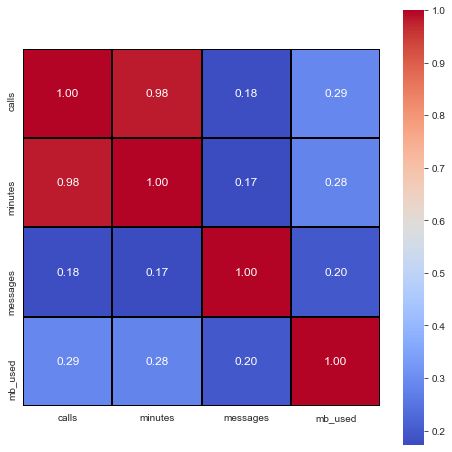

In [7]:
plt.figure(figsize=(8, 8))
sns.heatmap(df[['calls', 'minutes', 'messages', 'mb_used']].corr(), 
            cmap='coolwarm', linewidths=1, linecolor='black', square=True,
            annot=True, fmt='.2f', annot_kws={'size':12});

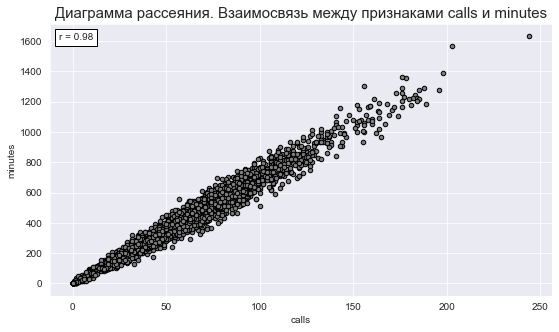

In [8]:
ax = df.plot(x = 'calls', y = 'minutes', 
            kind ='scatter', ec='black', figsize=(9, 5), 
            c=np.array([0.5, 0.5, 0.5]).reshape(1,-1))

Mytext = 'r = ' + str(round(df['calls'].corr(df['minutes']), 2))
txt = AnchoredText(Mytext, loc="upper left")                    
ax.add_artist(txt)
ax.set_title('Диаграмма рассеяния. Взаимосвязь между признаками calls и minutes', fontsize=15);

**Выводы:**
1. Стоит оптимизировать типы данных, а именно:
    - целевой признак `is_ultra` приведем к *category*;
    - признаки `calls`,  `messages` — к целочисленному типу данных;
2. Исходная таблица не содержит пропущенных и повторяющихся значений.
3. Описательная статистика числовых признаков в пределах нормы, отрицательных либо невероятных экстремальных значений не обнаружено.
4. Обнаружена мультиколлинеарность между признаками `calls` и `minutes`. Коэффициент корреляции пирсона составляет *0.98*.

## Предобработка данных

In [9]:
df['calls'] = df['calls'].astype('uint')
df['messages'] = df['messages'].astype('uint')
df['is_ultra'] = df['is_ultra'].astype('category')

converted_float = df.select_dtypes(include=['float64']).apply(pd.to_numeric, downcast='float')
for column in converted_float.columns:
    df[column] = converted_float[column]

In [10]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   calls     3214 non-null   uint32  
 1   minutes   3214 non-null   float32 
 2   messages  3214 non-null   uint32  
 3   mb_used   3214 non-null   float32 
 4   is_ultra  3214 non-null   category
dtypes: category(1), float32(2), uint32(2)
memory usage: 53.6 KB


## Подготовка обучающей, валидационной и тестовой выборок

Для дальнейшей работы данные необходимо разбить на три части: обучающую, валидационную и тестовую. Размеры
тестового и валидационного наборов обычно равны. Оптимальным считается разбиение в соотношении 3:1:1.

In [11]:
features = df.drop(['is_ultra', 'minutes'], axis=1)
target = df['is_ultra']

In [12]:
features_train, features_test, target_train, target_test = train_test_split(features, target, 
                                                                            test_size = 0.4, random_state=random_seed)
features_valid, features_test, target_valid, target_test = train_test_split(features_test, target_test,
                                                                            test_size = 0.5, random_state=random_seed)
print(f'Размер обучающей выборки: {features_train.shape[0]} объектов')
print(f'Размер валидационной выборки: {features_valid.shape[0]} объекта')
print(f'Размер тестовой выборки: {features_test.shape[0]} объекта')

Размер обучающей выборки: 1928 объектов
Размер валидационной выборки: 643 объекта
Размер тестовой выборки: 643 объекта


## Моделирование

### Decision Tree

**На практике к наиболее распространенным гиперпараметрам *Дерева решений* относятся:**

- **criterion** — *entropy* или *gini*. Критерий неопределенности Джини быстрее, потому что он требует меньших вычислительных затрат. С другой стороны, результаты, полученные с использованием энтропийного критерия (прирост информации), несколько лучше. 
- **max_depth** — максимальная глубина дерева. При увеличении параметра резко возрастает качество на обучении, что, в итоге, может негативно сказываться на тестовой выборке ввиду переобучения;
- **min_samples_leaf** — минимальное число объектов в листе;
- **max_features** — максимальное число признаков, по которым ищется лучшее разбиение в дереве.

In [13]:
best_model_dt = None
best_accuracy_dt = float('-inf')
criterions = ['gini', 'entropy']
for depth in tqdm(range(1, 31)):
    for criterion in criterions:
        for max_feature in ['sqrt', 2, 3]:
            for leaf in range(2, 21):
                model = DecisionTreeClassifier(criterion=criterion, 
                                               max_depth=depth, 
                                               max_features=max_feature,
                                               min_samples_leaf=leaf,
                                               random_state=random_seed)
                
                model.fit(features_train, target_train)
                predictions = model.predict(features_valid)
                accuracy = accuracy_score(target_valid, predictions)
                if accuracy > best_accuracy_dt:
                    best_model_dt = model
                    best_accuracy_dt = accuracy

print(f'Accuracy: {best_accuracy_dt}', end='\n\n')
print('Гиперпараметры лучшей модели:', end='\n\n')
for k, v in best_model_dt.get_params(deep=True).items():
    if k in ('criterion', 'max_depth', 'max_features', 'min_samples_leaf'):
        print(f'{k} - {v}')

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:18<00:00,  1.64it/s]

Accuracy: 0.8180404354587869

Гиперпараметры лучшей модели:

criterion - gini
max_depth - 7
max_features - 3
min_samples_leaf - 16


### Random Forest

**На практике к наиболее распространенным гиперпараметрам *Cлучайного леса* относятся:**
- **n_estimators** — количество деревьев. При увеличении параметра качество на обучении повышается, в свою очередь качество на тестовой выборке в определенный момент выходит на асимптоту;
- **criterion** — *entropy* или *gini*. Критерий неопределенности Джини быстрее, потому что он требует меньших вычислительных затрат. С другой стороны, результаты, полученные с использованием энтропийного критерия (прирост информации), несколько лучше. 
- **max_depth** — максимальная глубина дерева. При увеличении параметра резко возрастает качество на обучении, что, в итоге, может негативно сказываться на тестовой выборке ввиду переобучения;
- **min_samples_leaf** — минимальное число объектов в листе. Ввиду небольшого потенциального прироста *accuracy*, но значительного замедления обучения, в данном случае параметр стоит опустить;
- **max_features** — максимальное число признаков, по которым ищется лучшее разбиение в дереве.

In [14]:
best_model_rf = None
best_accuracy_rf = float('-inf')
for est in tqdm(range(2, 61)):
    for depth in range(1, 21):
        for max_feature in ['sqrt', 2, 3]:
            model = RandomForestClassifier(n_estimators = est,
                                           criterion='entropy', 
                                           max_depth=depth, 
                                           max_features=max_feature,
                                           #min_samples_leaf=leaf,
                                           random_state=random_seed,
                                           n_jobs=-1)
                
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
            accuracy = accuracy_score(target_valid, predictions)
            if accuracy > best_accuracy_rf:
                best_model_rf = model
                best_accuracy_rf = accuracy

print(f'Accuracy: {best_accuracy_rf}', end='\n\n')
print('Гиперпараметры лучшей модели:', end='\n\n')
for k, v in best_model_rf.get_params(deep=True).items():
    if k in ('n_estimators', 'criterion', 'max_depth', 'max_features', 'min_samples_leaf'):
        print(f'{k} - {v}')

100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [04:38<00:00,  4.73s/it]

Accuracy: 0.8242612752721618

Гиперпараметры лучшей модели:

criterion - entropy
max_depth - 15
max_features - sqrt
min_samples_leaf - 1
n_estimators - 22


### LogisticRegression

**На практике к наиболее распространенным гиперпараметрам *Логистической регрессии* относятся:**
- **penalty** — метод регуляризации. Для выбора метода регуляризации между *L1* и *L2* необходимо учитывать объем данных. *L1* подходит в случаях небольшого количества объектов;
- **параметр регуляризации C** — чем меньше значение, тем сильнее регуляризация;
- **solver** — алгоритм, использующийся для оптимизации. Для небольшой обучающей выборки вместе с *L1* регуляризацией оптимальным будет *liblinear*.

In [15]:
best_model_lr = None
best_accuracy_lr = float('-inf')
for c in tqdm(np.logspace(-2, 3, 500)):
    model = LogisticRegression(C=c,
                               penalty='l1',
                               max_iter=1e5,
                               solver='liblinear',
                               random_state=random_seed)
                
    model.fit(features_train, target_train)
    predictions = model.predict(features_valid)
    accuracy = accuracy_score(target_valid, predictions)
    if accuracy > best_accuracy_lr:
        best_model_lr = model
        best_accuracy_lr = accuracy

print(f'Accuracy: {best_accuracy_lr}', end='\n\n')
print('Гиперпараметры лучшей модели:', end='\n\n')
for k, v in best_model_lr.get_params(deep=True).items():
    if k in ('penalty', 'C', 'solver'):
        print(f'{k} - {v}')

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 168.47it/s]

Accuracy: 0.7589424572317263

Гиперпараметры лучшей модели:

C - 0.10766241770454933
penalty - l1
solver - liblinear


In [20]:
accuracy_df = pd.DataFrame(index=['DecisionTree', 'RandomForest', 'LogisticRegression'], 
                           data = [best_accuracy_dt, best_accuracy_rf, best_accuracy_lr],
                           columns=['Accuracy']).sort_values('Accuracy', ascending=False).style.background_gradient('coolwarm')

In [21]:
accuracy_df

,Accuracy
RandomForest,0.824261
DecisionTree,0.818040
LogisticRegression,0.758942


**Выводы:** 

В результате проведенного исследования лучший результат *0.8243* показала модель *Random Forest* со следущими параметрами:
- criterion — entropy;
- max_depth — 15;
- max_features — sqrt;
- n_estimators — 22.

## Проверка модели на тестовой выборке

In [18]:
predictions = best_model_rf.predict(features_test)
accuracy = accuracy_score(target_test, predictions)
print(f'Accuracy модели Random Forest на тестовой выборке: {accuracy}')

Accuracy модели Random Forest на тестовой выборке: 0.8118195956454122


## Проверка модели на вменяемость

Проверка модели на адекватность с использованием простого классификатора `DummyClassifier`:
- strategy «most_frequent» генерирует наиболее частую метку в обучающем наборе.

In [19]:
dummy_model = DummyClassifier(strategy='most_frequent').fit(features_train, target_train)
dummy_predictions = dummy_model.predict(features_test)
dummy_accuracy = accuracy_score(target_test, dummy_predictions)
print(f'Accuracy DummyClassifier на тестовой выборке: {dummy_accuracy}')

Accuracy DummyClassifier на тестовой выборке: 0.6982892690513219


**Выводы:** при сравнении обученной модели со случайной можно сказать, что модель *Random Forest* предсказывает адекватные значения для тестовой выборки.

## Общий вывод

Перед нами стояла задача построить модель для бинарной классификации, которая предскажет подходящий тариф для пользователей оператора связи «Мегалайн».

Для достижения поставленной цели было изучено и смоделировано три алгоритма классификации:
   - Decision Tree;
   - Random Forest;
   - Logistic Regression.

В качестве метрики оценки производительности алгоритма была выбрана самая простая метрика качества алгоритма, решающего задачу классификации – это доля правильных ответов или *accuracy*.

В результате проведенного исследования лучший результат *accuracy* *0.8243* показала модель *Random Forest* со следущими параметрами:
   - criterion — entropy;
   - max_depth — 15;
   - max_features — sqrt;
   - n_estimators — 22.